In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
from google.colab import files
uploaded = files.upload()
df = uploaded
df = pd.read_csv('AirQualityUCI(1).csv')
df.head()

Saving AirQualityUCI(1).csv to AirQualityUCI(1).csv


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1554.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [3]:
df.drop(['Unnamed: 15', 'Unnamed: 16'],axis= 1, inplace = True)

In [5]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [6]:
df.dropna(how = 'all',inplace = True)

In [7]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [8]:
df['PT08_feat'] = ( df['PT08.S2(NMHC)'] + df['PT08.S1(CO)'] + df['PT08.S4(NO2)'] + df['PT08.S5(O3)']) / 4

In [9]:
df.drop(columns=['PT08.S1(CO)', 'PT08.S2(NMHC)','PT08.S4(NO2)', 'PT08.S5(O3)'],axis=1,inplace=True)

In [10]:
df.loc[df.PT08_feat < 0, 'PT08_feat'] = df.PT08_feat.mean()
df.loc[df['CO(GT)'] < 0, 'CO(GT)'] = df['CO(GT)'].mean()
df.loc[df['RH'] < 0, 'RH'] = df['RH'].mean()
df.loc[df['C6H6(GT)'] < -50, 'C6H6(GT)'] = df['C6H6(GT)'].mean()
df.loc[df['PT08.S3(NOx)'] < 0, 'PT08.S3(NOx)'] = df['PT08.S3(NOx)'].mean()
df.loc[df['NO2(GT)'] < -50, 'NO2(GT)'] = df['NO2(GT)'].mean()
df.loc[df['T'] < -50, 'T'] = df['T'].mean()

In [11]:
df.to_csv('air_datasat_time.csv')

In [12]:
df.head()

,Date,Time,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),T,RH,AH,PT08_feat
0,3/10/2004,18:00:00,2.6,150.0,11.9,166.0,1056.0,113.0,13.6,48.9,0.7578,1341.50
1,3/10/2004,19:00:00,2.0,112.0,9.4,103.0,1174.0,92.0,13.3,47.7,0.7255,1194.50
2,3/10/2004,20:00:00,2.2,88.0,9.0,131.0,1140.0,114.0,11.9,54.0,0.7502,1242.25
3,3/10/2004,21:00:00,2.2,80.0,9.2,172.0,1092.0,122.0,11.0,60.0,0.7867,1277.75
4,3/10/2004,22:00:00,1.6,51.0,6.5,131.0,1205.0,116.0,11.2,59.6,0.7888,1177.00


In [13]:
df['Datetime'] = pd.to_datetime(df['Date'].apply(str)+' '+df['Time'])

In [14]:
df.drop(columns=['Date','Time'],axis = 1,inplace=True)

In [15]:
df.set_index(df.Datetime, inplace = True)

In [16]:
df.head()

,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),T,RH,AH,PT08_feat,Datetime
Datetime,,,,,,,,,,,
2004-03-10 18:00:00,2.6,150.0,11.9,166.0,1056.0,113.0,13.6,48.9,0.7578,1341.50,2004-03-10 18:00:00
2004-03-10 19:00:00,2.0,112.0,9.4,103.0,1174.0,92.0,13.3,47.7,0.7255,1194.50,2004-03-10 19:00:00
2004-03-10 20:00:00,2.2,88.0,9.0,131.0,1140.0,114.0,11.9,54.0,0.7502,1242.25,2004-03-10 20:00:00
2004-03-10 21:00:00,2.2,80.0,9.2,172.0,1092.0,122.0,11.0,60.0,0.7867,1277.75,2004-03-10 21:00:00
2004-03-10 22:00:00,1.6,51.0,6.5,131.0,1205.0,116.0,11.2,59.6,0.7888,1177.00,2004-03-10 22:00:00


# Time series

### Mesi

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 13, 4

In [18]:
ts = df['C6H6(GT)'].loc["2004-03-10" : "2004-04-10"]
ts1 = df['C6H6(GT)'].loc["2004-04-10" : "2004-05-10"]
ts2 = df['C6H6(GT)'].loc["2004-05-10" : "2004-06-10"]
ts3 = df['C6H6(GT)'].loc["2004-06-10" : "2004-07-10"]
ts4 = df['C6H6(GT)'].loc["2004-07-10" : "2004-08-10"]
ts5 = df['C6H6(GT)'].loc["2004-08-10" : "2004-09-10"]
ts6 = df['C6H6(GT)'].loc["2004-09-10" : "2004-10-10"]
ts7 = df['C6H6(GT)'].loc["2004-10-10" : "2004-11-10"]
ts8 = df['C6H6(GT)'].loc["2004-11-10" : "2004-12-10"]
ts9 = df['C6H6(GT)'].loc["2004-12-10" : "2005-01-10"]
ts10 = df['C6H6(GT)'].loc["2005-01-10" : "2005-02-10"]
ts11 = df['C6H6(GT)'].loc["2005-02-10" : "2005-03-10"]
ts12 = df['C6H6(GT)'].loc["2005-03-10" : "2005-04-10"]

df_marzo1 = pd.DataFrame(data = {'marzo1':ts})
df_aprile = pd.DataFrame(data = {'aprile':ts1})
df_maggio = pd.DataFrame(data = {'maggio':ts2})
df_giugno = pd.DataFrame(data = {'giugno':ts3})
df_luglio = pd.DataFrame(data = {'luglio':ts4})
df_agosto = pd.DataFrame(data = {'agosto':ts5})
df_settembre = pd.DataFrame(data = {'settembre':ts6})
df_ottobre = pd.DataFrame(data = {'ottobre':ts7})
df_novembre = pd.DataFrame(data = {'novembre':ts8})
df_dicembre = pd.DataFrame(data = {'dicembre':ts9})
df_gennaio = pd.DataFrame(data = {'gennaio':ts10})
df_febbraio = pd.DataFrame(data = {'febbraio':ts11})
df_marzo2 = pd.DataFrame(data = {'marzo2':ts12})


df_marzo1.reset_index(inplace= True)
df_aprile.reset_index(inplace= True)
df_maggio.reset_index(inplace= True)
df_giugno.reset_index(inplace= True)
df_luglio.reset_index(inplace= True)
df_agosto.reset_index(inplace= True)
df_settembre.reset_index(inplace= True)
df_ottobre.reset_index(inplace= True)
df_novembre.reset_index(inplace= True)
df_dicembre.reset_index(inplace= True)
df_gennaio.reset_index(inplace= True)
df_febbraio.reset_index(inplace= True)
df_marzo2.reset_index(inplace= True)

ts_marzo1_c6 = pd.Series(df_marzo1.marzo1)
ts_aprile_c6 = pd.Series(df_aprile.aprile)
ts_maggio_c6 = pd.Series(df_maggio.maggio)
ts_giugno_c6 = pd.Series(df_giugno.giugno)
ts_luglio_c6 = pd.Series(df_luglio.luglio)
ts_agosto_c6 = pd.Series(df_agosto.agosto)
ts_settembre_c6 = pd.Series(df_settembre.settembre)
ts_ottobre_c6 = pd.Series(df_ottobre.ottobre)
ts_novembre_c6 = pd.Series(df_novembre.novembre)
ts_dicembre_c6 = pd.Series(df_dicembre.dicembre)
ts_gennaio_c6 = pd.Series(df_gennaio.gennaio)
ts_febbraio_c6 = pd.Series(df_febbraio.febbraio)
ts_marzo2_c6 = pd.Series(df_marzo2.marzo2)


lista_mesi_c6 = [ts_marzo1_c6,ts_aprile_c6,ts_maggio_c6,ts_giugno_c6,ts_luglio_c6,ts_agosto_c6,ts_settembre_c6,ts_ottobre_c6,ts_novembre_c6,ts_dicembre_c6,ts_gennaio_c6,ts_febbraio_c6,ts_marzo2_c6]

In [19]:
ts = df['PT08_feat'].loc["2004-03-10" : "2004-04-10"]
ts1 = df['PT08_feat'].loc["2004-04-10" : "2004-05-10"]
ts2 = df['PT08_feat'].loc["2004-05-10" : "2004-06-10"]
ts3 = df['PT08_feat'].loc["2004-06-10" : "2004-07-10"]
ts4 = df['PT08_feat'].loc["2004-07-10" : "2004-08-10"]
ts5 = df['PT08_feat'].loc["2004-08-10" : "2004-09-10"]
ts6 = df['PT08_feat'].loc["2004-09-10" : "2004-10-10"]
ts7 = df['PT08_feat'].loc["2004-10-10" : "2004-11-10"]
ts8 = df['PT08_feat'].loc["2004-11-10" : "2004-12-10"]
ts9 = df['PT08_feat'].loc["2004-12-10" : "2005-01-10"]
ts10 = df['PT08_feat'].loc["2005-01-10" : "2005-02-10"]
ts11 = df['PT08_feat'].loc["2005-02-10" : "2005-03-10"]
ts12 = df['PT08_feat'].loc["2005-03-10" : "2005-04-10"]

df_marzo1 = pd.DataFrame(data = {'marzo1':ts})
df_aprile = pd.DataFrame(data = {'aprile':ts1})
df_maggio = pd.DataFrame(data = {'maggio':ts2})
df_giugno = pd.DataFrame(data = {'giugno':ts3})
df_luglio = pd.DataFrame(data = {'luglio':ts4})
df_agosto = pd.DataFrame(data = {'agosto':ts5})
df_settembre = pd.DataFrame(data = {'settembre':ts6})
df_ottobre = pd.DataFrame(data = {'ottobre':ts7})
df_novembre = pd.DataFrame(data = {'novembre':ts8})
df_dicembre = pd.DataFrame(data = {'dicembre':ts9})
df_gennaio = pd.DataFrame(data = {'gennaio':ts10})
df_febbraio = pd.DataFrame(data = {'febbraio':ts11})
df_marzo2 = pd.DataFrame(data = {'marzo2':ts12})


df_marzo1.reset_index(inplace= True)
df_aprile.reset_index(inplace= True)
df_maggio.reset_index(inplace= True)
df_giugno.reset_index(inplace= True)
df_luglio.reset_index(inplace= True)
df_agosto.reset_index(inplace= True)
df_settembre.reset_index(inplace= True)
df_ottobre.reset_index(inplace= True)
df_novembre.reset_index(inplace= True)
df_dicembre.reset_index(inplace= True)
df_gennaio.reset_index(inplace= True)
df_febbraio.reset_index(inplace= True)
df_marzo2.reset_index(inplace= True)

ts_marzo1_pt = pd.Series(df_marzo1.marzo1)
ts_aprile_pt = pd.Series(df_aprile.aprile)
ts_maggio_pt = pd.Series(df_maggio.maggio)
ts_giugno_pt = pd.Series(df_giugno.giugno)
ts_luglio_pt = pd.Series(df_luglio.luglio)
ts_agosto_pt = pd.Series(df_agosto.agosto)
ts_settembre_pt = pd.Series(df_settembre.settembre)
ts_ottobre_pt = pd.Series(df_ottobre.ottobre)
ts_novembre_pt = pd.Series(df_novembre.novembre)
ts_dicembre_pt = pd.Series(df_dicembre.dicembre)
ts_gennaio_pt = pd.Series(df_gennaio.gennaio)
ts_febbraio_pt = pd.Series(df_febbraio.febbraio)
ts_marzo2_pt = pd.Series(df_marzo2.marzo2)


lista_mesi_pt = [ts_marzo1_pt,ts_aprile_pt,ts_maggio_pt,ts_giugno_pt,ts_luglio_pt,ts_agosto_pt,ts_settembre_pt,ts_ottobre_pt,ts_novembre_pt,ts_dicembre_pt,ts_gennaio_pt,ts_febbraio_pt,ts_marzo2_pt]

In [20]:
ts = df['RH'].loc["2004-03-10" : "2004-04-10"]
ts1 = df['RH'].loc["2004-04-10" : "2004-05-10"]
ts2 = df['RH'].loc["2004-05-10" : "2004-06-10"]
ts3 = df['RH'].loc["2004-06-10" : "2004-07-10"]
ts4 = df['RH'].loc["2004-07-10" : "2004-08-10"]
ts5 = df['RH'].loc["2004-08-10" : "2004-09-10"]
ts6 = df['RH'].loc["2004-09-10" : "2004-10-10"]
ts7 = df['RH'].loc["2004-10-10" : "2004-11-10"]
ts8 = df['RH'].loc["2004-11-10" : "2004-12-10"]
ts9 = df['RH'].loc["2004-12-10" : "2005-01-10"]
ts10 = df['RH'].loc["2005-01-10" : "2005-02-10"]
ts11 = df['RH'].loc["2005-02-10" : "2005-03-10"]
ts12 = df['RH'].loc["2005-03-10" : "2005-04-10"]

df_marzo1 = pd.DataFrame(data = {'marzo1':ts})
df_aprile = pd.DataFrame(data = {'aprile':ts1})
df_maggio = pd.DataFrame(data = {'maggio':ts2})
df_giugno = pd.DataFrame(data = {'giugno':ts3})
df_luglio = pd.DataFrame(data = {'luglio':ts4})
df_agosto = pd.DataFrame(data = {'agosto':ts5})
df_settembre = pd.DataFrame(data = {'settembre':ts6})
df_ottobre = pd.DataFrame(data = {'ottobre':ts7})
df_novembre = pd.DataFrame(data = {'novembre':ts8})
df_dicembre = pd.DataFrame(data = {'dicembre':ts9})
df_gennaio = pd.DataFrame(data = {'gennaio':ts10})
df_febbraio = pd.DataFrame(data = {'febbraio':ts11})
df_marzo2 = pd.DataFrame(data = {'marzo2':ts12})


df_marzo1.reset_index(inplace= True)
df_aprile.reset_index(inplace= True)
df_maggio.reset_index(inplace= True)
df_giugno.reset_index(inplace= True)
df_luglio.reset_index(inplace= True)
df_agosto.reset_index(inplace= True)
df_settembre.reset_index(inplace= True)
df_ottobre.reset_index(inplace= True)
df_novembre.reset_index(inplace= True)
df_dicembre.reset_index(inplace= True)
df_gennaio.reset_index(inplace= True)
df_febbraio.reset_index(inplace= True)
df_marzo2.reset_index(inplace= True)

ts_marzo1_rh = pd.Series(df_marzo1.marzo1)
ts_aprile_rh = pd.Series(df_aprile.aprile)
ts_maggio_rh = pd.Series(df_maggio.maggio)
ts_giugno_rh = pd.Series(df_giugno.giugno)
ts_luglio_rh = pd.Series(df_luglio.luglio)
ts_agosto_rh = pd.Series(df_agosto.agosto)
ts_settembre_rh = pd.Series(df_settembre.settembre)
ts_ottobre_rh = pd.Series(df_ottobre.ottobre)
ts_novembre_rh = pd.Series(df_novembre.novembre)
ts_dicembre_rh = pd.Series(df_dicembre.dicembre)
ts_gennaio_rh = pd.Series(df_gennaio.gennaio)
ts_febbraio_rh = pd.Series(df_febbraio.febbraio)
ts_marzo2_rh = pd.Series(df_marzo2.marzo2)


lista_mesi_rh = [ts_marzo1_rh,ts_aprile_rh,ts_maggio_rh,ts_giugno_rh,ts_luglio_rh,ts_agosto_rh,ts_settembre_rh,ts_ottobre_rh,ts_novembre_rh,ts_dicembre_rh,ts_gennaio_rh,ts_febbraio_rh,ts_marzo2_rh]

### Stagioni

In [21]:
ts = df['C6H6(GT)'].loc["2004-03-21" : "2004-06-20"]
ts1 = df['C6H6(GT)'].loc["2004-06-21" : "2004-09-20"]
ts2 = df['C6H6(GT)'].loc["2004-09-21" : "2004-12-20"]
ts3 = df['C6H6(GT)'].loc["2004-12-20" : "2005-03-20"]

df_primavera = pd.DataFrame(data = {'primavera':ts})
df_estate = pd.DataFrame(data = {'estate':ts1})
df_autunno = pd.DataFrame(data = {'autunno':ts2})
df_inverno = pd.DataFrame(data = {'inverno':ts3})


df_primavera.reset_index(inplace= True)
df_estate.reset_index(inplace= True)
df_inverno.reset_index(inplace= True)
df_autunno.reset_index(inplace= True)


ts_primavera_c6 = pd.Series(df_primavera.primavera)
ts_estate_c6 = pd.Series(df_estate.estate)
ts_autunno_c6 = pd.Series(df_autunno.autunno)
ts_inverno_c6 = pd.Series(df_inverno.inverno)

lista_stagioni_c6 = [ts_primavera_c6,ts_estate_c6,ts_autunno_c6,ts_inverno_c6]

In [22]:
ts = df['PT08_feat'].loc["2004-03-21" : "2004-06-20"]
ts1 = df['PT08_feat'].loc["2004-06-21" : "2004-09-20"]
ts2 = df['PT08_feat'].loc["2004-09-21" : "2004-12-20"]
ts3 = df['PT08_feat'].loc["2004-12-20" : "2005-03-20"]

df_primavera = pd.DataFrame(data = {'primavera':ts})
df_estate = pd.DataFrame(data = {'estate':ts1})
df_autunno = pd.DataFrame(data = {'autunno':ts2})
df_inverno = pd.DataFrame(data = {'inverno':ts3})


df_primavera.reset_index(inplace= True)
df_estate.reset_index(inplace= True)
df_inverno.reset_index(inplace= True)
df_autunno.reset_index(inplace= True)


ts_primavera_pt = pd.Series(df_primavera.primavera)
ts_estate_pt = pd.Series(df_estate.estate)
ts_autunno_pt = pd.Series(df_autunno.autunno)
ts_inverno_pt = pd.Series(df_inverno.inverno)

lista_stagioni_pt = [ts_primavera_pt,ts_estate_pt,ts_autunno_pt,ts_inverno_pt]

In [23]:
ts = df['RH'].loc["2004-03-21" : "2004-06-20"]
ts1 = df['RH'].loc["2004-06-21" : "2004-09-20"]
ts2 = df['RH'].loc["2004-09-21" : "2004-12-20"]
ts3 = df['RH'].loc["2004-12-20" : "2005-03-20"]

df_primavera = pd.DataFrame(data = {'primavera':ts})
df_estate = pd.DataFrame(data = {'estate':ts1})
df_autunno = pd.DataFrame(data = {'autunno':ts2})
df_inverno = pd.DataFrame(data = {'inverno':ts3})


df_primavera.reset_index(inplace= True)
df_estate.reset_index(inplace= True)
df_inverno.reset_index(inplace= True)
df_autunno.reset_index(inplace= True)


ts_primavera_rh = pd.Series(df_primavera.primavera)
ts_estate_rh = pd.Series(df_estate.estate)
ts_autunno_rh = pd.Series(df_autunno.autunno)
ts_inverno_rh = pd.Series(df_inverno.inverno)

lista_stagioni_rh = [ts_primavera_rh,ts_estate_rh,ts_autunno_rh,ts_inverno_rh]

In [24]:
for i in lista_mesi_c6:
  print(len(i))

750
744
768
744
768
768
744
768
744
768
768
696
615


In [25]:
for i in lista_stagioni_c6:
  print(len(i))

2208
2208
2184
2184


In [26]:
def offset_translation(x,y):
  plt.plot(x - x.mean())
  plt.plot(y - y.mean())
  plt.show()

def amplitude_scaling(x,y):
  plt.plot((x - x.mean())/x.std())
  plt.plot((y - y.mean())/y.std())
  plt.show()  

def trend_removal(x):
  plt.plot(x)
  plt.plot(x.rolling(window=12).mean())
  plt.show()

def noise_removal(x,y):
  w = 10
  plt.plot(((x - x.mean())/x.std()).rolling(window=w).mean())
  plt.plot(((y - y.mean())/y.std()).rolling(window=w).mean())
  plt.show()

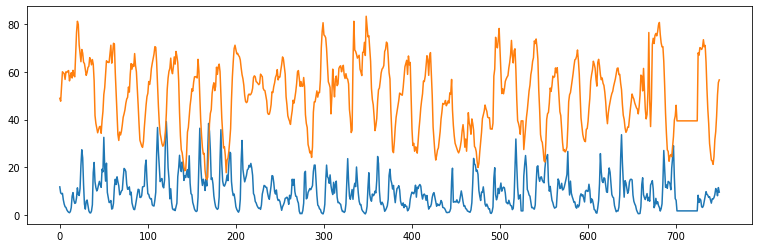

In [27]:
plt.plot(ts_marzo1_c6)
plt.plot(ts_marzo1_rh)
plt.show()

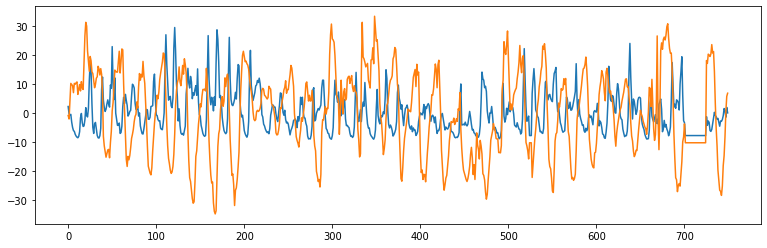

In [28]:
# offset transaltion
offset_translation(ts_marzo1_c6,ts_marzo1_rh)


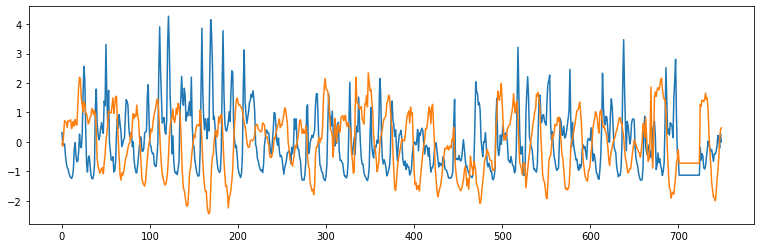

In [29]:
amplitude_scaling(ts_marzo1_c6,ts_marzo1_rh)

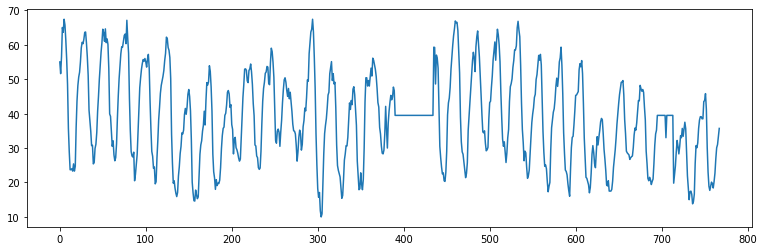

In [30]:
plt.plot(ts_agosto_rh)

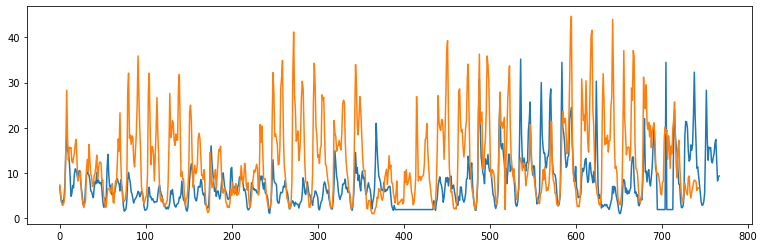

In [31]:
plt.plot(ts_agosto_c6)
plt.plot(ts_settembre_c6)
plt.show()

# Motif/anomalies and shapelets

In [32]:
!pip install pyts

     |████████████████████████████████| 2.5MB 10.7MB/s 


In [33]:
from pyts.datasets import make_cylinder_bell_funnel

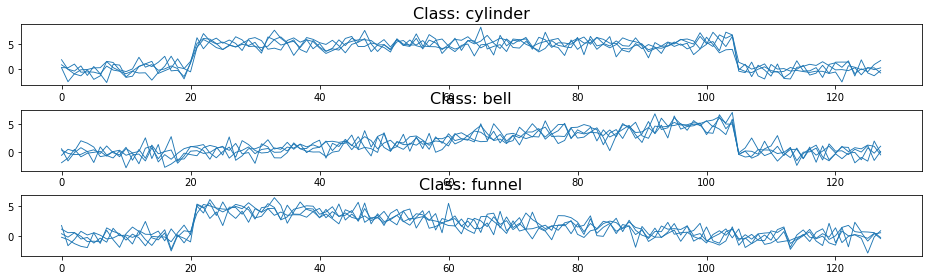

In [34]:
X, y = make_cylinder_bell_funnel(n_samples=12, random_state=42)

plt.figure()
for i, classe in enumerate(['cylinder', 'bell', 'funnel']):
    plt.subplot(3, 1, i + 1)
    for x in X[y == i]:
        plt.plot(x, color='C0', linewidth=0.9)
    plt.title('Class: {}'.format(classe), fontsize=16)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()

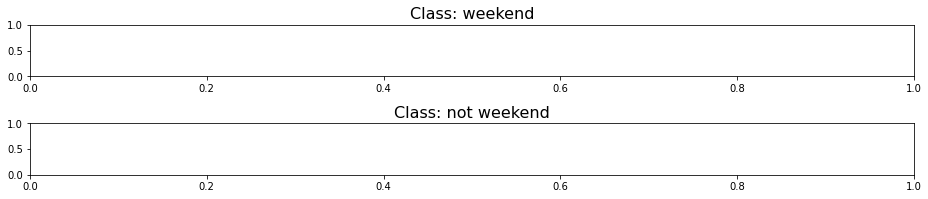

In [35]:
ts_labels=np.array(len(ts_agosto_c6))
ts=np.array(ts_agosto_c6)

plt.figure()
for i, classe in enumerate(['weekend', 'not weekend']):
    plt.subplot(3, 1, i + 1)
    for x in ts[ts_labels == i]:
        plt.plot(x, color='C0', linewidth=0.9)
    plt.title('Class: {}'.format(classe), fontsize=16)

plt.tight_layout()
plt.subplots_adjust(hspace=0.9)
plt.show()



In [36]:
X.shape

(12, 128)

In [37]:
!pip install tslearn

     |████████████████████████████████| 778kB 11.7MB/s 


In [38]:
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

from tslearn.preprocessing import TimeSeriesScalerMinMax

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [39]:
n_ts, ts_sz = X.shape
n_classes = len(set(y))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 12
ts_sz 128
n_classes 3
shapelet_sizes {12: 3}


In [40]:
# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=200,
                        verbose=1)

/usr/local/lib/python3.6/dist-packages/tslearn/shapelets.py:363: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  FutureWarning)


In [41]:
shp_clf.fit(X, y)

Epoch 1/200
1/1 [==============================] - 0s 1ms/step - loss: 1.2091 - categorical_accuracy: 0.4167 - categorical_crossentropy: 1.1682
Epoch 2/200
1/1 [==============================] - 0s 1ms/step - loss: 1.1880 - categorical_accuracy: 0.4167 - categorical_crossentropy: 1.1471
Epoch 3/200
1/1 [==============================] - 0s 1ms/step - loss: 1.1678 - categorical_accuracy: 0.4167 - categorical_crossentropy: 1.1270
Epoch 4/200
1/1 [==============================] - 0s 2ms/step - loss: 1.1485 - categorical_accuracy: 0.4167 - categorical_crossentropy: 1.1077
Epoch 5/200
1/1 [==============================] - 0s 2ms/step - loss: 1.1301 - categorical_accuracy: 0.4167 - categorical_crossentropy: 1.0894
Epoch 6/200
1/1 [==============================] - 0s 1ms/step - loss: 1.1125 - categorical_accuracy: 0.4167 - categorical_crossentropy: 1.0719
Epoch 7/200
1/1 [==============================] - 0s 2ms/step - loss: 1.0959 - categorical_accuracy: 0.4167 - categorical_crossentropy:

LearningShapelets(batch_size=256, max_iter=200, max_size=None,
                  n_shapelets_per_size={12: 3}, optimizer='sgd',
                  random_state=None, scale=False, shapelet_length=0.15,
                  total_lengths=3, verbose=1, weight_regularizer=0.01)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
predicted_labels = shp_clf.predict(X)
print("Correct classification rate:", accuracy_score(y, predicted_labels))

1/1 [==============================] - 0s 1ms/step
Correct classification rate: 0.8333333333333334


In [45]:
predicted_locations = shp_clf.locate(X)

1/1 [==============================] - 0s 2ms/step


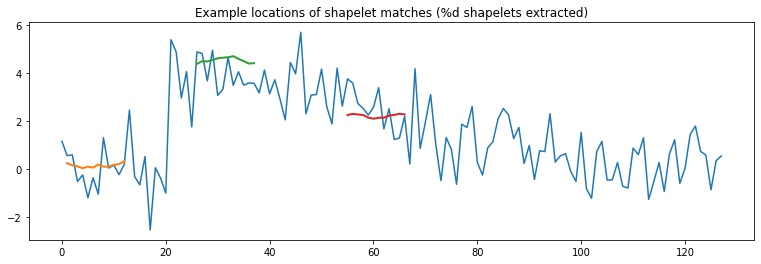

In [46]:
ts_id = 0
plt.figure()
n_shapelets = sum(shapelet_sizes.values())
plt.title("Example locations of shapelet matches "
          "(%d shapelets extracted)".format(n_shapelets))

plt.plot(X[ts_id].ravel())
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)